In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
pd.set_option('display.max_columns', None)

In [2]:
# Load the weather dataset
data = pd.read_csv("C:/Users/Eniifeoluwa/Desktop/temperature.csv")  # Replace with the actual file path
data = data.dropna(axis = 0)
data.head(3)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.83000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.83465,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.84779,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5


In [4]:
vancouver_data = data["Vancouver"] 
la_data = data["Los Angeles"]

alpha = 0.05

t_stat, p_value = ttest_ind(vancouver_data, la_data, equal_var=False)  # Use Welch's t-test to handle unequal variances

# Print the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average temperatures between Vancouver and Los Angeles.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average temperatures between the two cities.")


t-statistic: -158.41391121750522
p-value: 0.0
Reject the null hypothesis: There is a significant difference in average temperatures between Vancouver and Los Angeles.


In [5]:
import scipy.stats as stats

# Degrees of freedom for Welch's t-test
df = (vancouver_data.var() / len(vancouver_data) + la_data.var() / len(la_data)) ** 2 / ((vancouver_data.var() / len(vancouver_data)) ** 2 / (len(vancouver_data) - 1) + 
      (la_data.var() / len(la_data)) ** 2 / (len(la_data) - 1))

# Calculate the critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha / 2, df)

# Plot the t-distribution with rejection regions
x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)



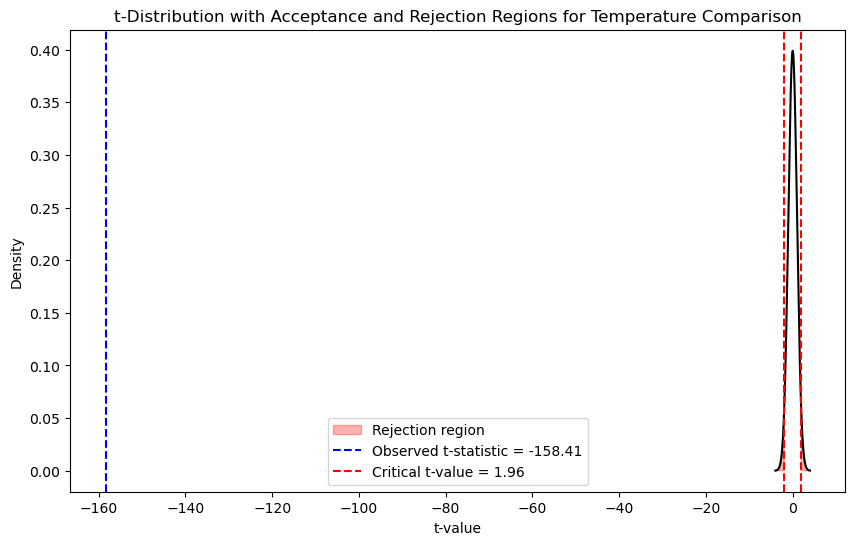

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='black')
plt.fill_between(x, y, where=(x >= critical_t) | (x <= -critical_t), color='red', alpha=0.3, label="Rejection region")
plt.axvline(t_stat, color='blue', linestyle='--', label=f"Observed t-statistic = {t_stat:.2f}")

# Annotate the critical values
plt.axvline(critical_t, color='red', linestyle='--', label=f"Critical t-value = {critical_t:.2f}")
plt.axvline(-critical_t, color='red', linestyle='--')

# Labels and legend
plt.title("t-Distribution with Acceptance and Rejection Regions for Temperature Comparison")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend()
plt.show()
